In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

In [3]:
fraud=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\Decision Tree\Fraud_Check.csv')

### EDA

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

<AxesSubplot:>

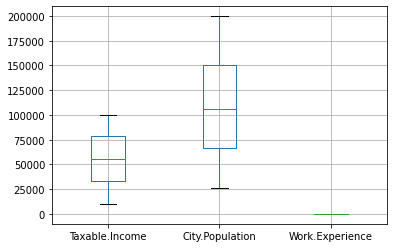

In [8]:
fraud.boxplot()

<AxesSubplot:>

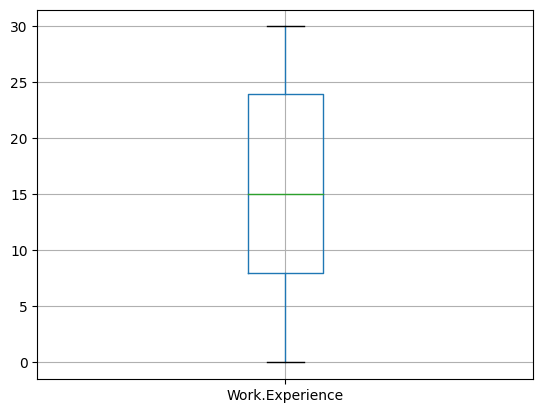

In [9]:
fraud[['Work.Experience']].boxplot()

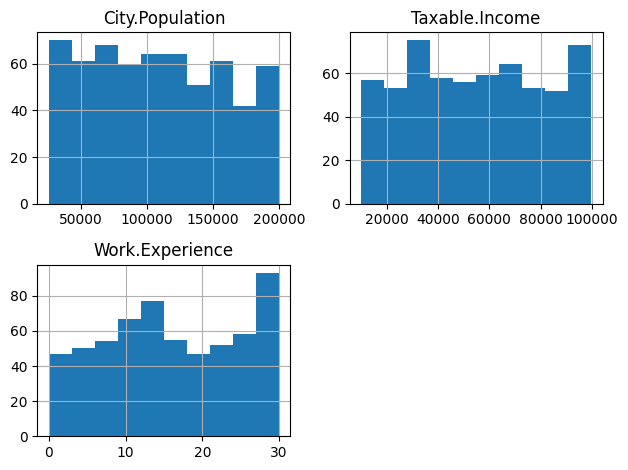

In [10]:
fraud.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:>

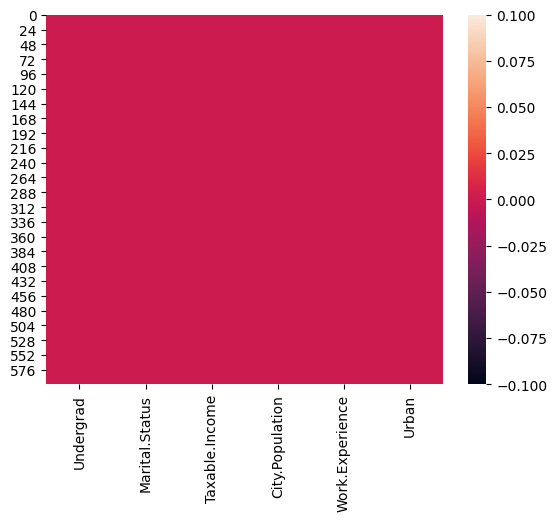

In [11]:
sns.heatmap(fraud.isnull())

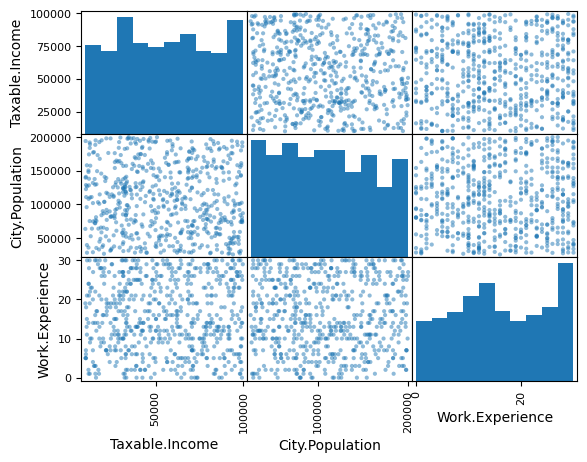

In [12]:
pd.plotting.scatter_matrix(fraud)
plt.show()

In [13]:
fraud.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [14]:
fraud['Undergrad'].unique()

array(['NO', 'YES'], dtype=object)

In [15]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [16]:
fraud['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [17]:
oe=OrdinalEncoder()

In [18]:
fraud['Urban']=oe.fit_transform(fraud[['Urban']])

In [19]:
fraud['Undergrad']=oe.fit_transform(fraud[['Undergrad']])

In [20]:
fraud['Marital.Status']=oe.fit_transform(fraud[['Marital.Status']])

In [21]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


In [22]:
fraud['Tax_cat']= ['Risky' if income<=30000 else 'Good' for income in fraud['Taxable.Income']]

In [23]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_cat
0,0.0,2.0,68833,50047,10,1.0,Good
1,1.0,0.0,33700,134075,18,1.0,Good
2,0.0,1.0,36925,160205,30,1.0,Good
3,1.0,2.0,50190,193264,15,1.0,Good
4,0.0,1.0,81002,27533,28,0.0,Good


In [24]:
#fraud['Tax_cat']=oe.fit_transform(fraud[['Tax_cat']])

In [25]:
X=fraud[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
Y=fraud['Tax_cat']

In [26]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,2.0,50047,10,1.0
1,1.0,0.0,134075,18,1.0
2,0.0,1.0,160205,30,1.0
3,1.0,2.0,193264,15,1.0
4,0.0,1.0,27533,28,0.0
...,...,...,...,...,...
595,1.0,0.0,39492,7,1.0
596,1.0,0.0,55369,2,1.0
597,0.0,0.0,154058,0,1.0
598,1.0,1.0,180083,17,0.0


In [28]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_cat, Length: 600, dtype: object

In [29]:
Y.value_counts()

Good     476
Risky    124
Name: Tax_cat, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

In [32]:
y_train.value_counts()

Good     384
Risky     96
Name: Tax_cat, dtype: int64

In [33]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

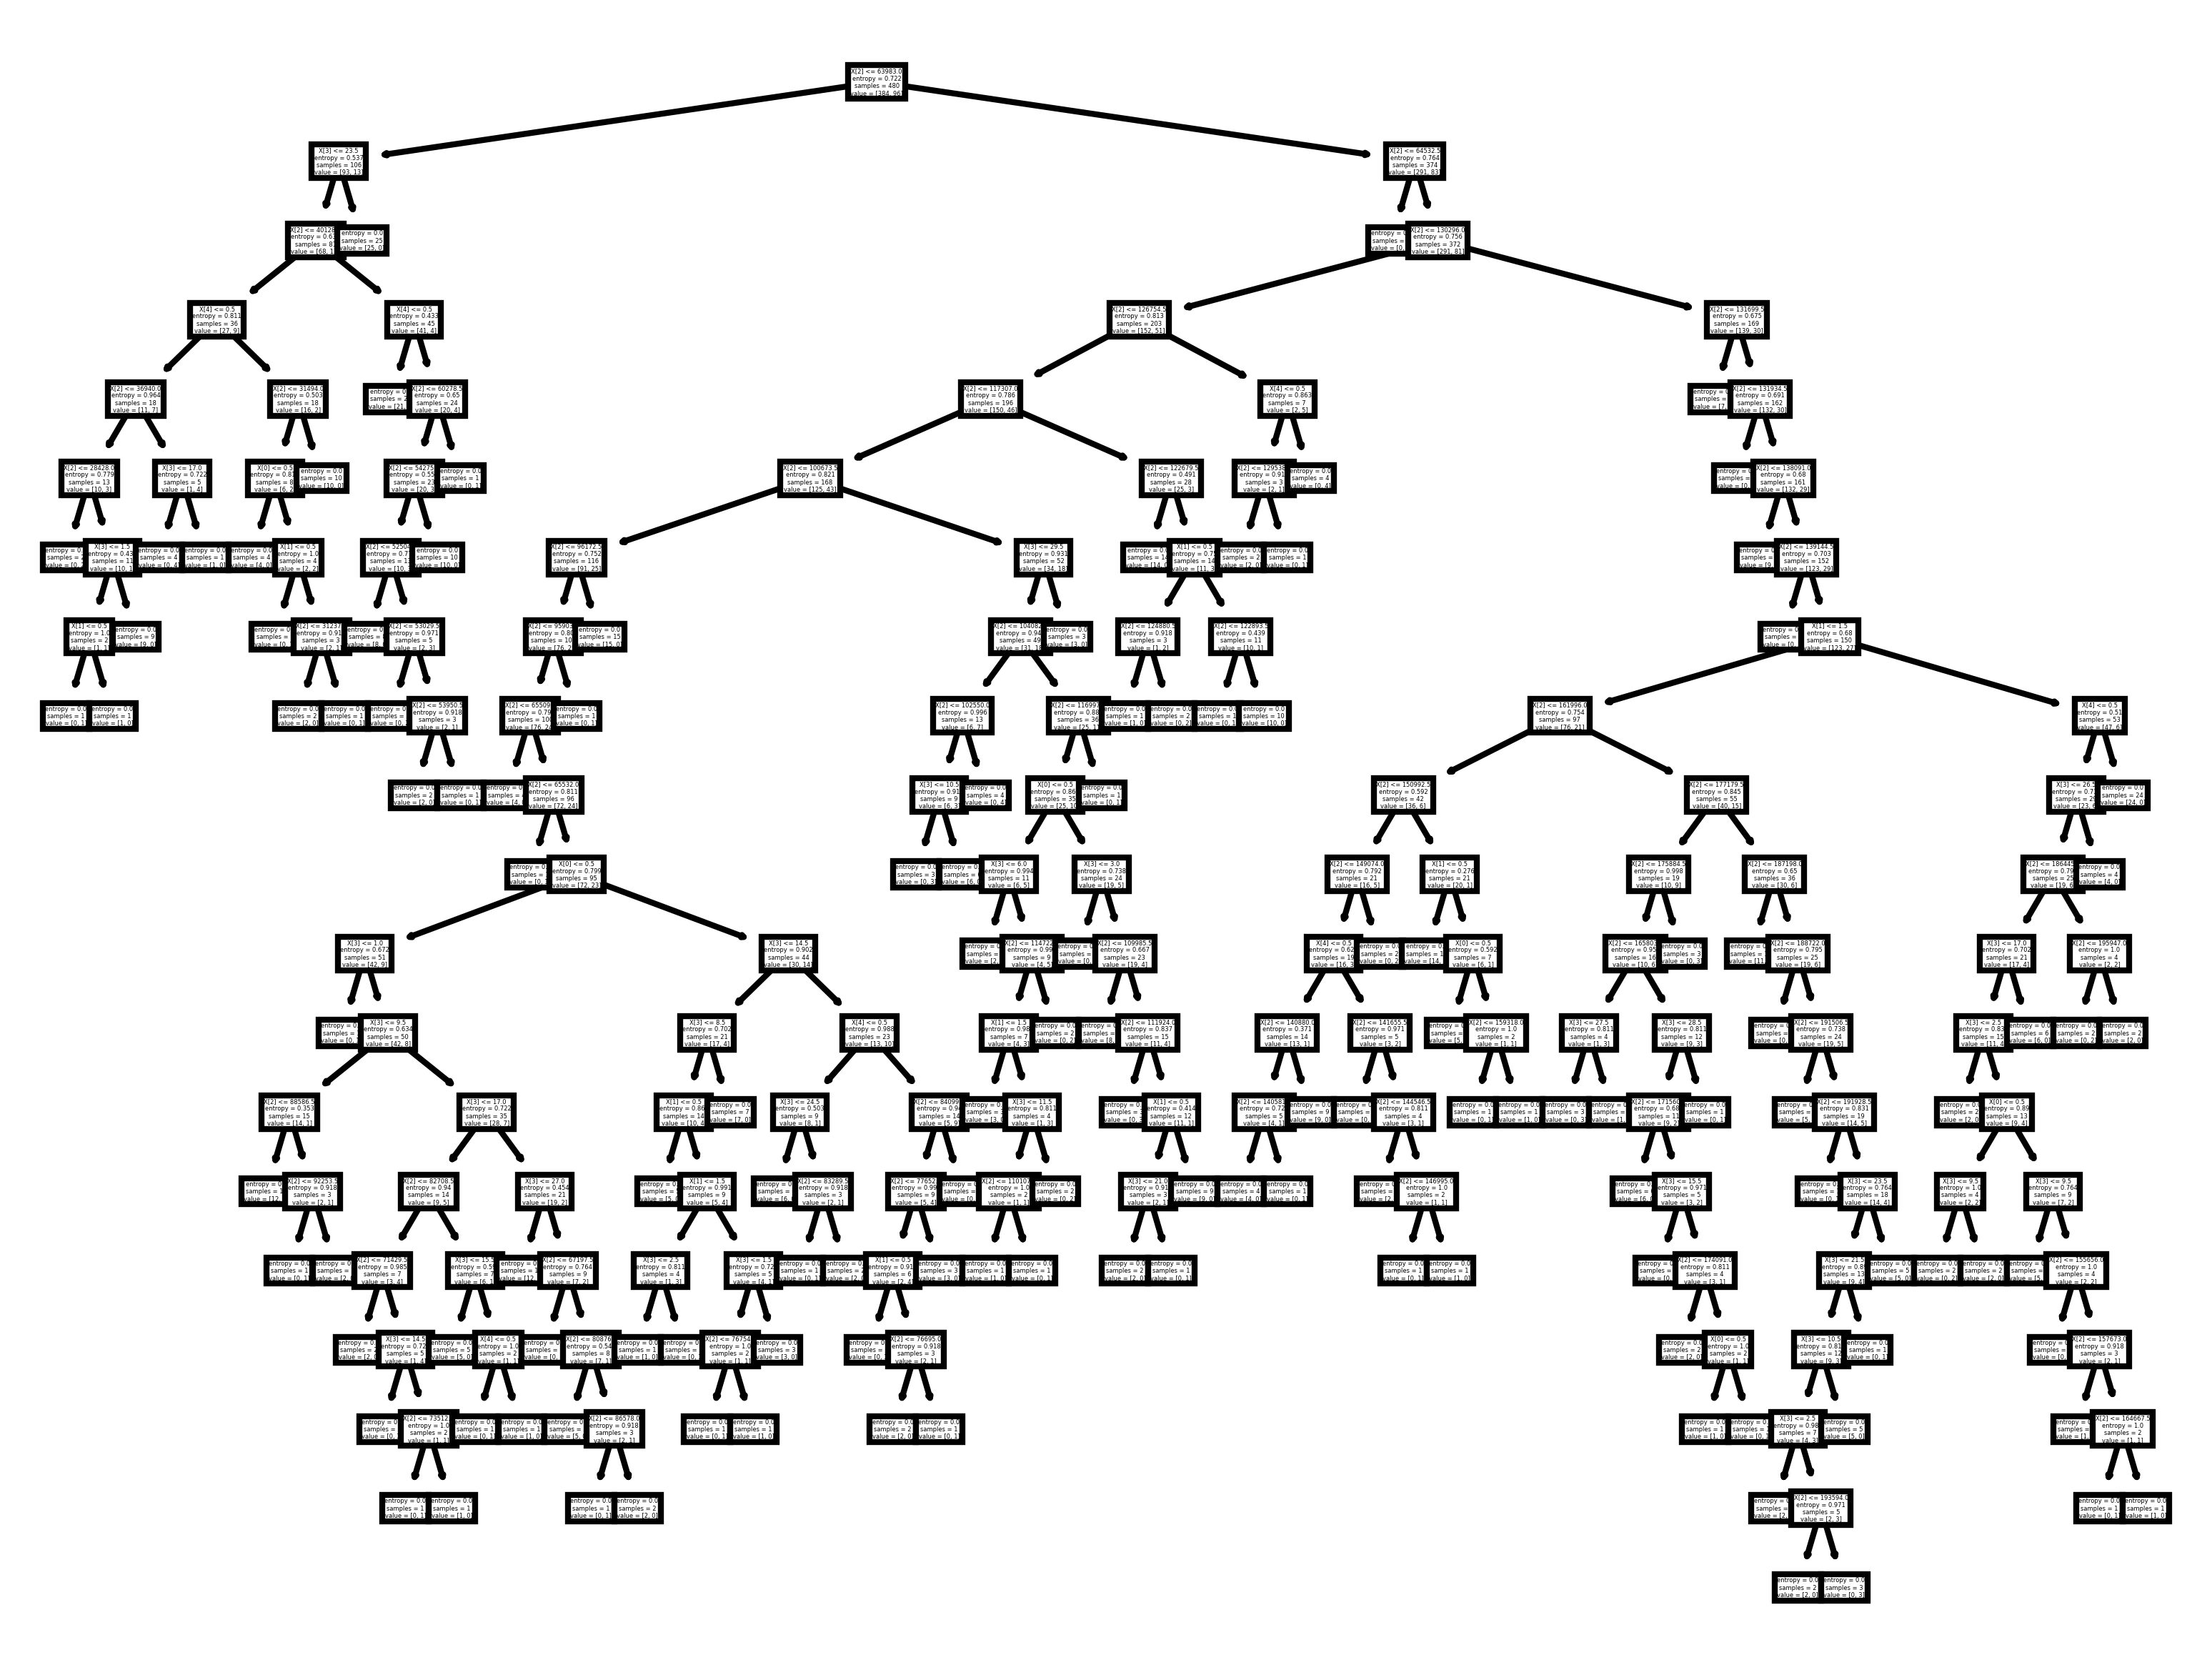

In [34]:
#PLot the decision tree
plt.figure(dpi=600)
tree.plot_tree(model);

In [84]:
preds_train = model.predict(x_train)
preds_train

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good

In [85]:
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

        Good       1.00      1.00      1.00       384
       Risky       1.00      1.00      1.00        96

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



In [35]:
preds = model.predict(x_test)
preds

array(['Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', '

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        Good       0.79      0.84      0.81        92
       Risky       0.32      0.25      0.28        28

    accuracy                           0.70       120
   macro avg       0.55      0.54      0.55       120
weighted avg       0.68      0.70      0.69       120



In [37]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

In [38]:
accuracy_score(y_test,preds)

0.7

In [39]:
precision_score(y_test,preds,average='weighted')

0.6766233766233766

In [40]:
recall_score(y_test,preds,average='weighted')

0.7

In [41]:
f1_score(y_test,preds,average='weighted')

0.6867368421052633

In [42]:
model_new=DecisionTreeClassifier(criterion='entropy', max_depth=10,min_samples_split=5)
model_new.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=5)

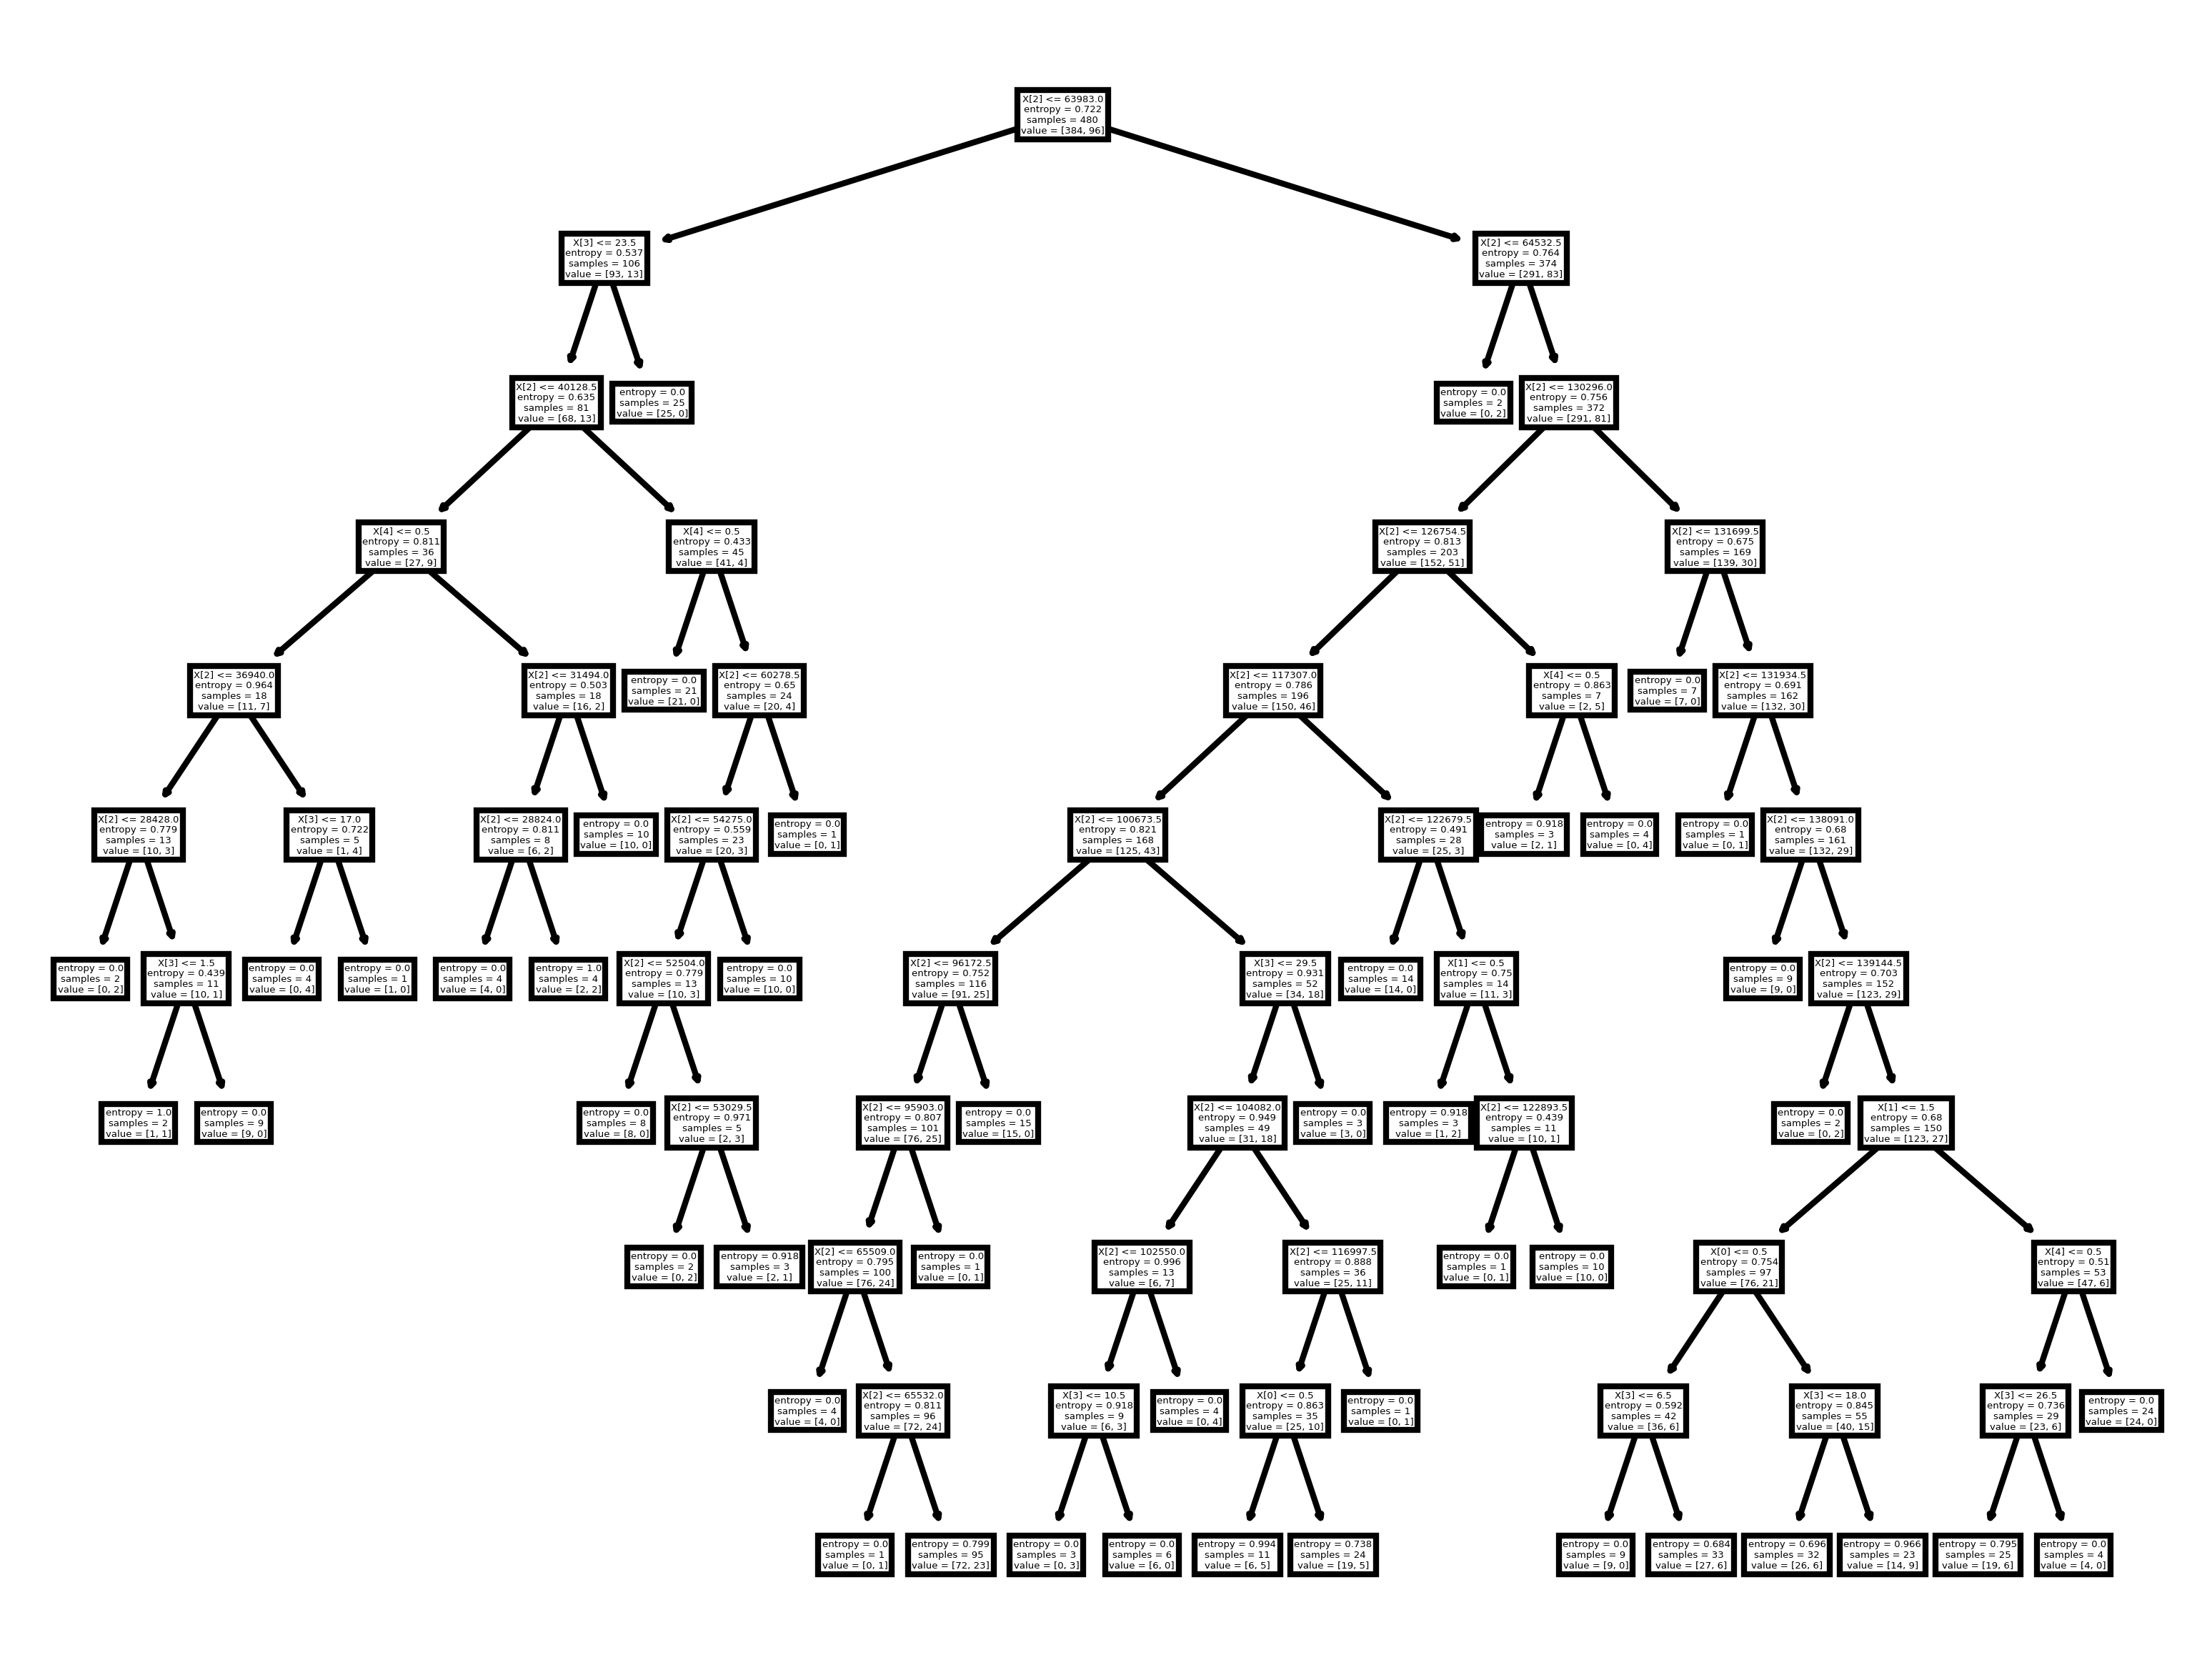

In [43]:
#PLot the decision tree
plt.figure(dpi=600)
tree.plot_tree(model_new);

In [44]:
preds1 = model_new.predict(x_test)
preds1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',

In [45]:
print(classification_report(y_test,preds1))

              precision    recall  f1-score   support

        Good       0.77      0.93      0.84        92
       Risky       0.25      0.07      0.11        28

    accuracy                           0.73       120
   macro avg       0.51      0.50      0.48       120
weighted avg       0.65      0.73      0.67       120



### Data Balancing

In [46]:
risky_data = fraud.loc[fraud["Tax_cat"]=="Risky"]
print(risky_data.shape)

(124, 7)


In [47]:
good_data = fraud.loc[fraud["Tax_cat"]=="Good"]
print(good_data.shape)

(476, 7)


#### Data is not balance hence we have to balance the Data

In [48]:
good_data_sample = good_data.sample(n = 124, replace = False)

In [49]:
good_data_sample.shape

(124, 7)

In [50]:
data_balance = pd.concat([good_data_sample, risky_data], ignore_index=True)
data_balance = data_balance.sample(n=len(data_balance), replace=False)

In [51]:
data_balance

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_cat
19,0.0,0.0,73795,65242,6,0.0,Good
242,1.0,0.0,12453,191874,30,1.0,Risky
205,0.0,1.0,16082,80991,0,1.0,Risky
115,1.0,2.0,62209,28504,1,0.0,Good
42,0.0,0.0,84429,57931,28,1.0,Good
...,...,...,...,...,...,...,...
226,0.0,1.0,11804,36055,24,1.0,Risky
159,0.0,2.0,22054,91889,16,0.0,Risky
57,1.0,0.0,35610,121608,24,0.0,Good
148,0.0,2.0,24557,32450,19,1.0,Risky


In [52]:
X1=data_balance[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
Y1=data_balance['Tax_cat']

In [53]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,Y1,test_size=0.2,random_state=40)

In [54]:
model_balance=DecisionTreeClassifier(criterion='entropy')
model_balance.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy')

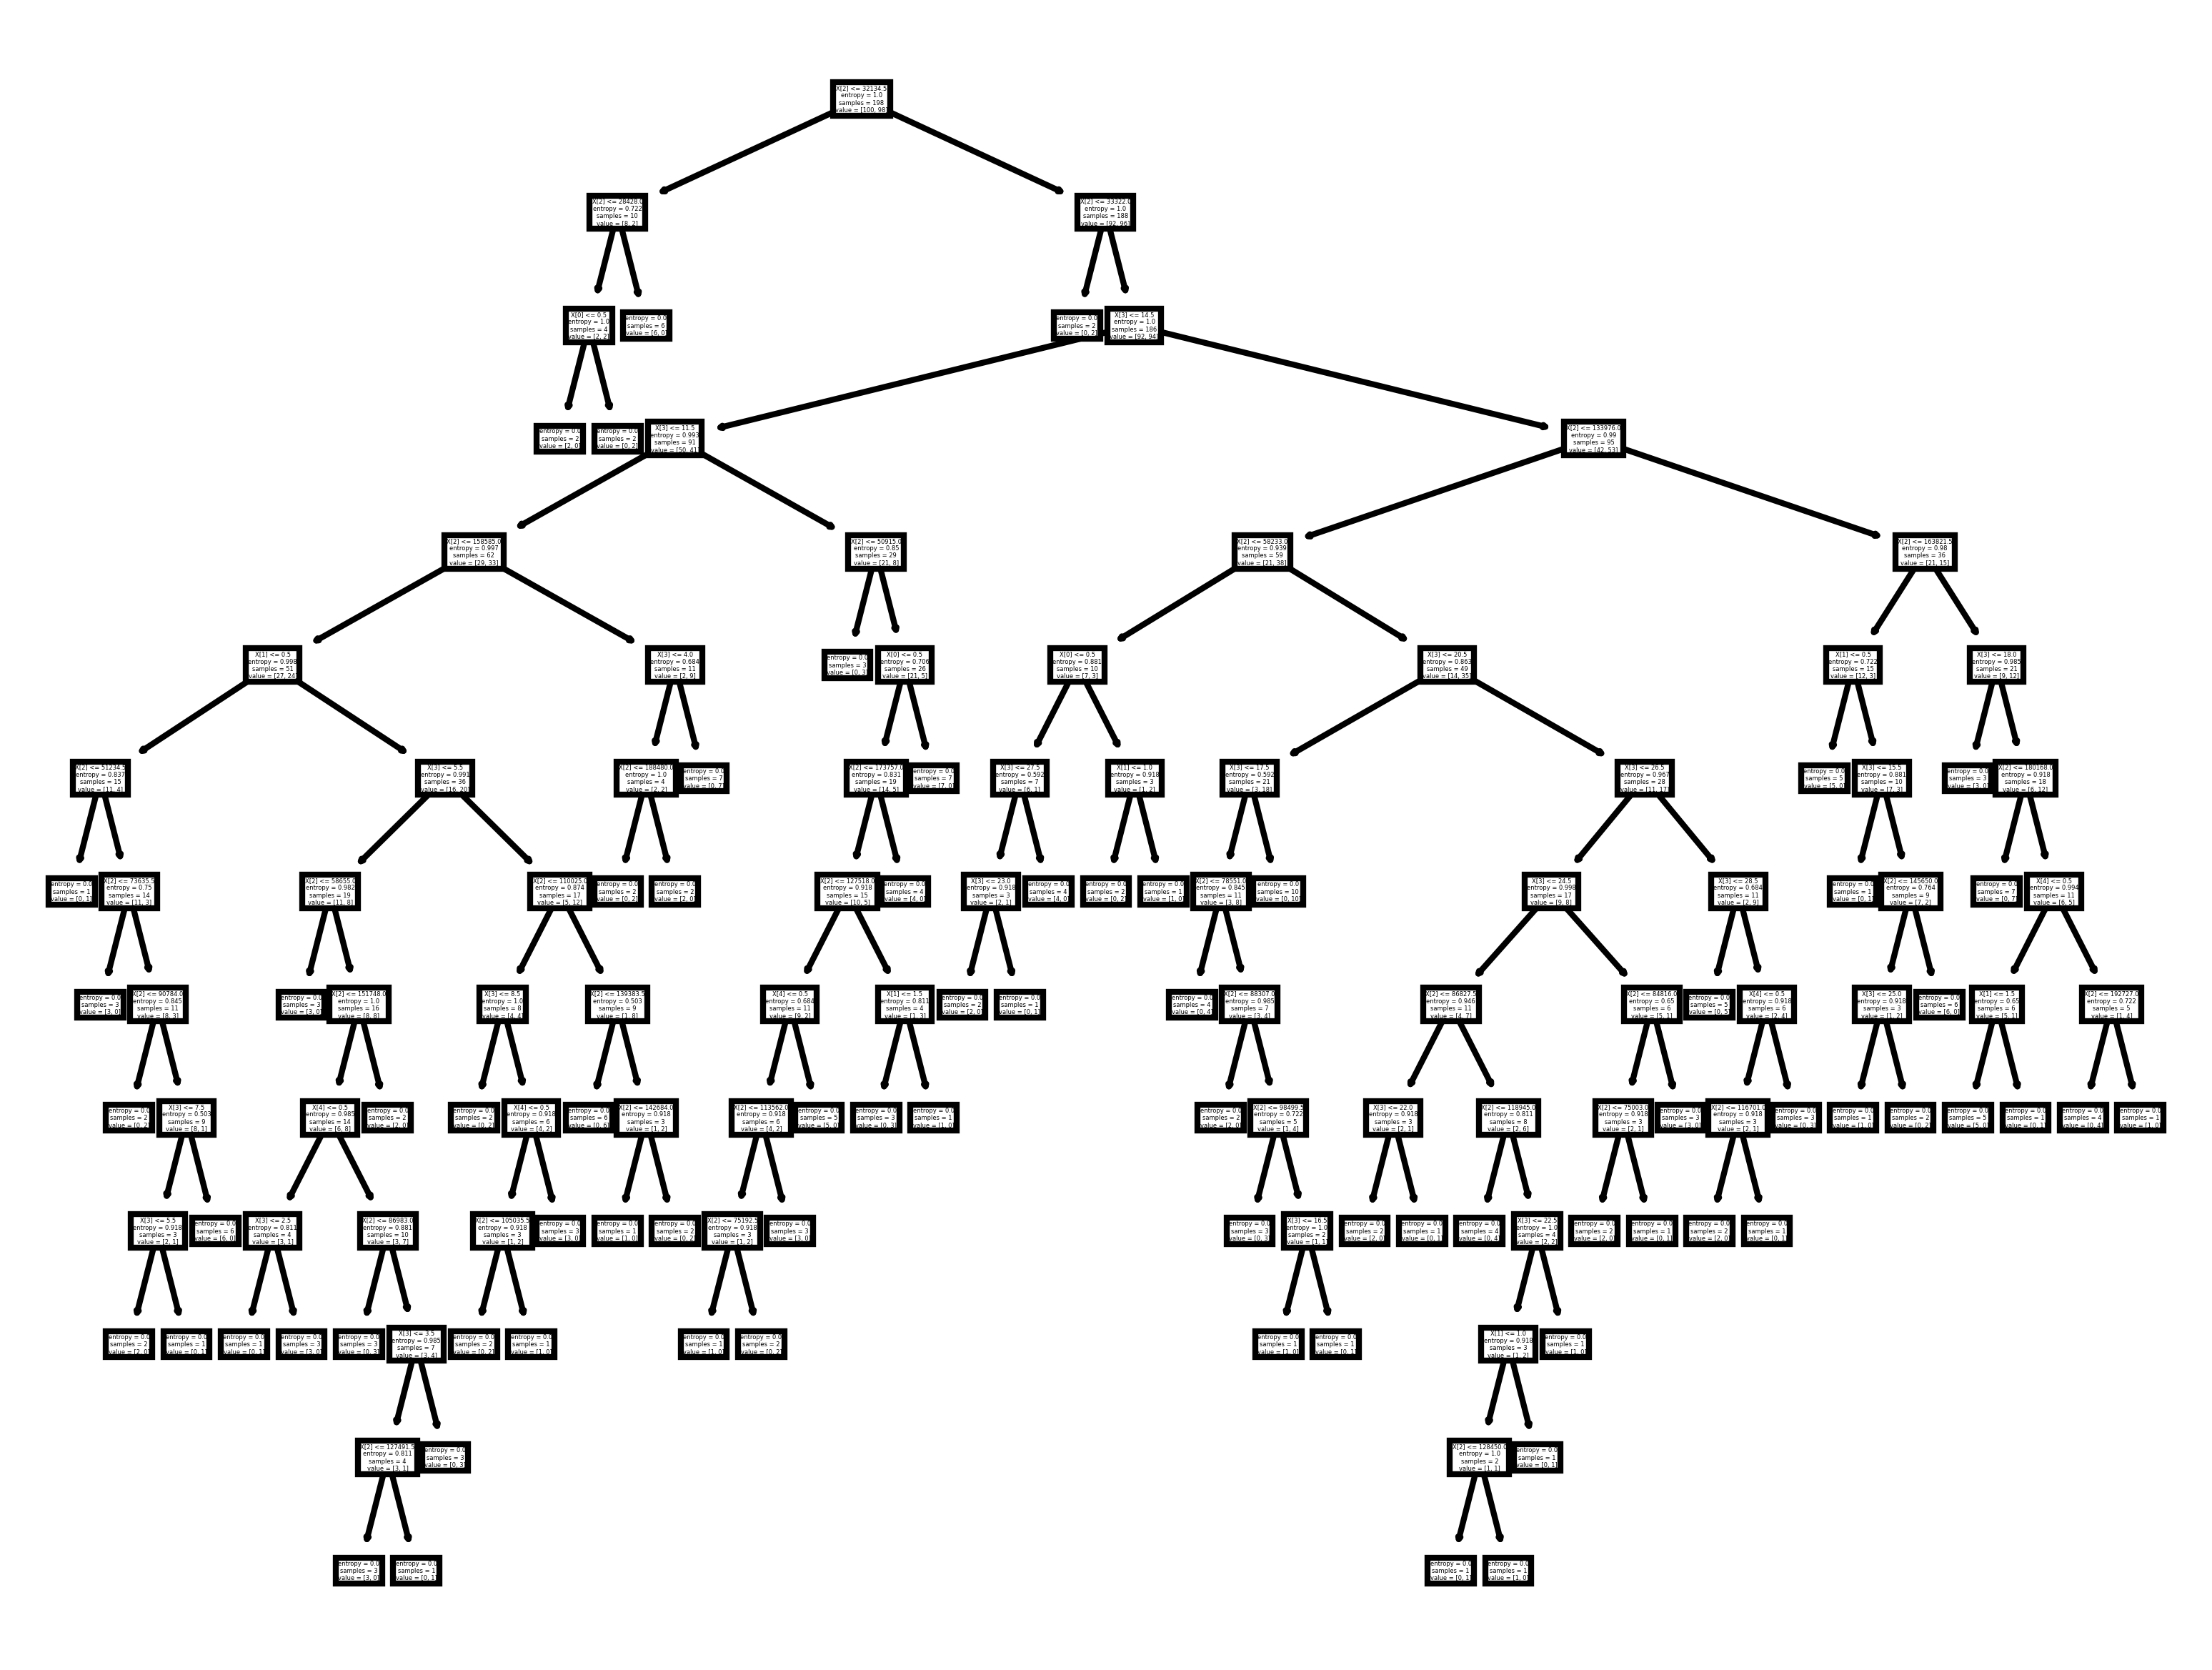

In [55]:
plt.figure(dpi=600)
tree.plot_tree(model_balance);

In [56]:
preds2 = model_balance.predict(x_test1)
preds2

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Risky', 'Risky'], dtype=object)

In [57]:
print(classification_report(y_test1,preds2))

              precision    recall  f1-score   support

        Good       0.44      0.58      0.50        24
       Risky       0.44      0.31      0.36        26

    accuracy                           0.44        50
   macro avg       0.44      0.45      0.43        50
weighted avg       0.44      0.44      0.43        50



In [58]:
model_balance1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_split=4)
model_balance1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=4)

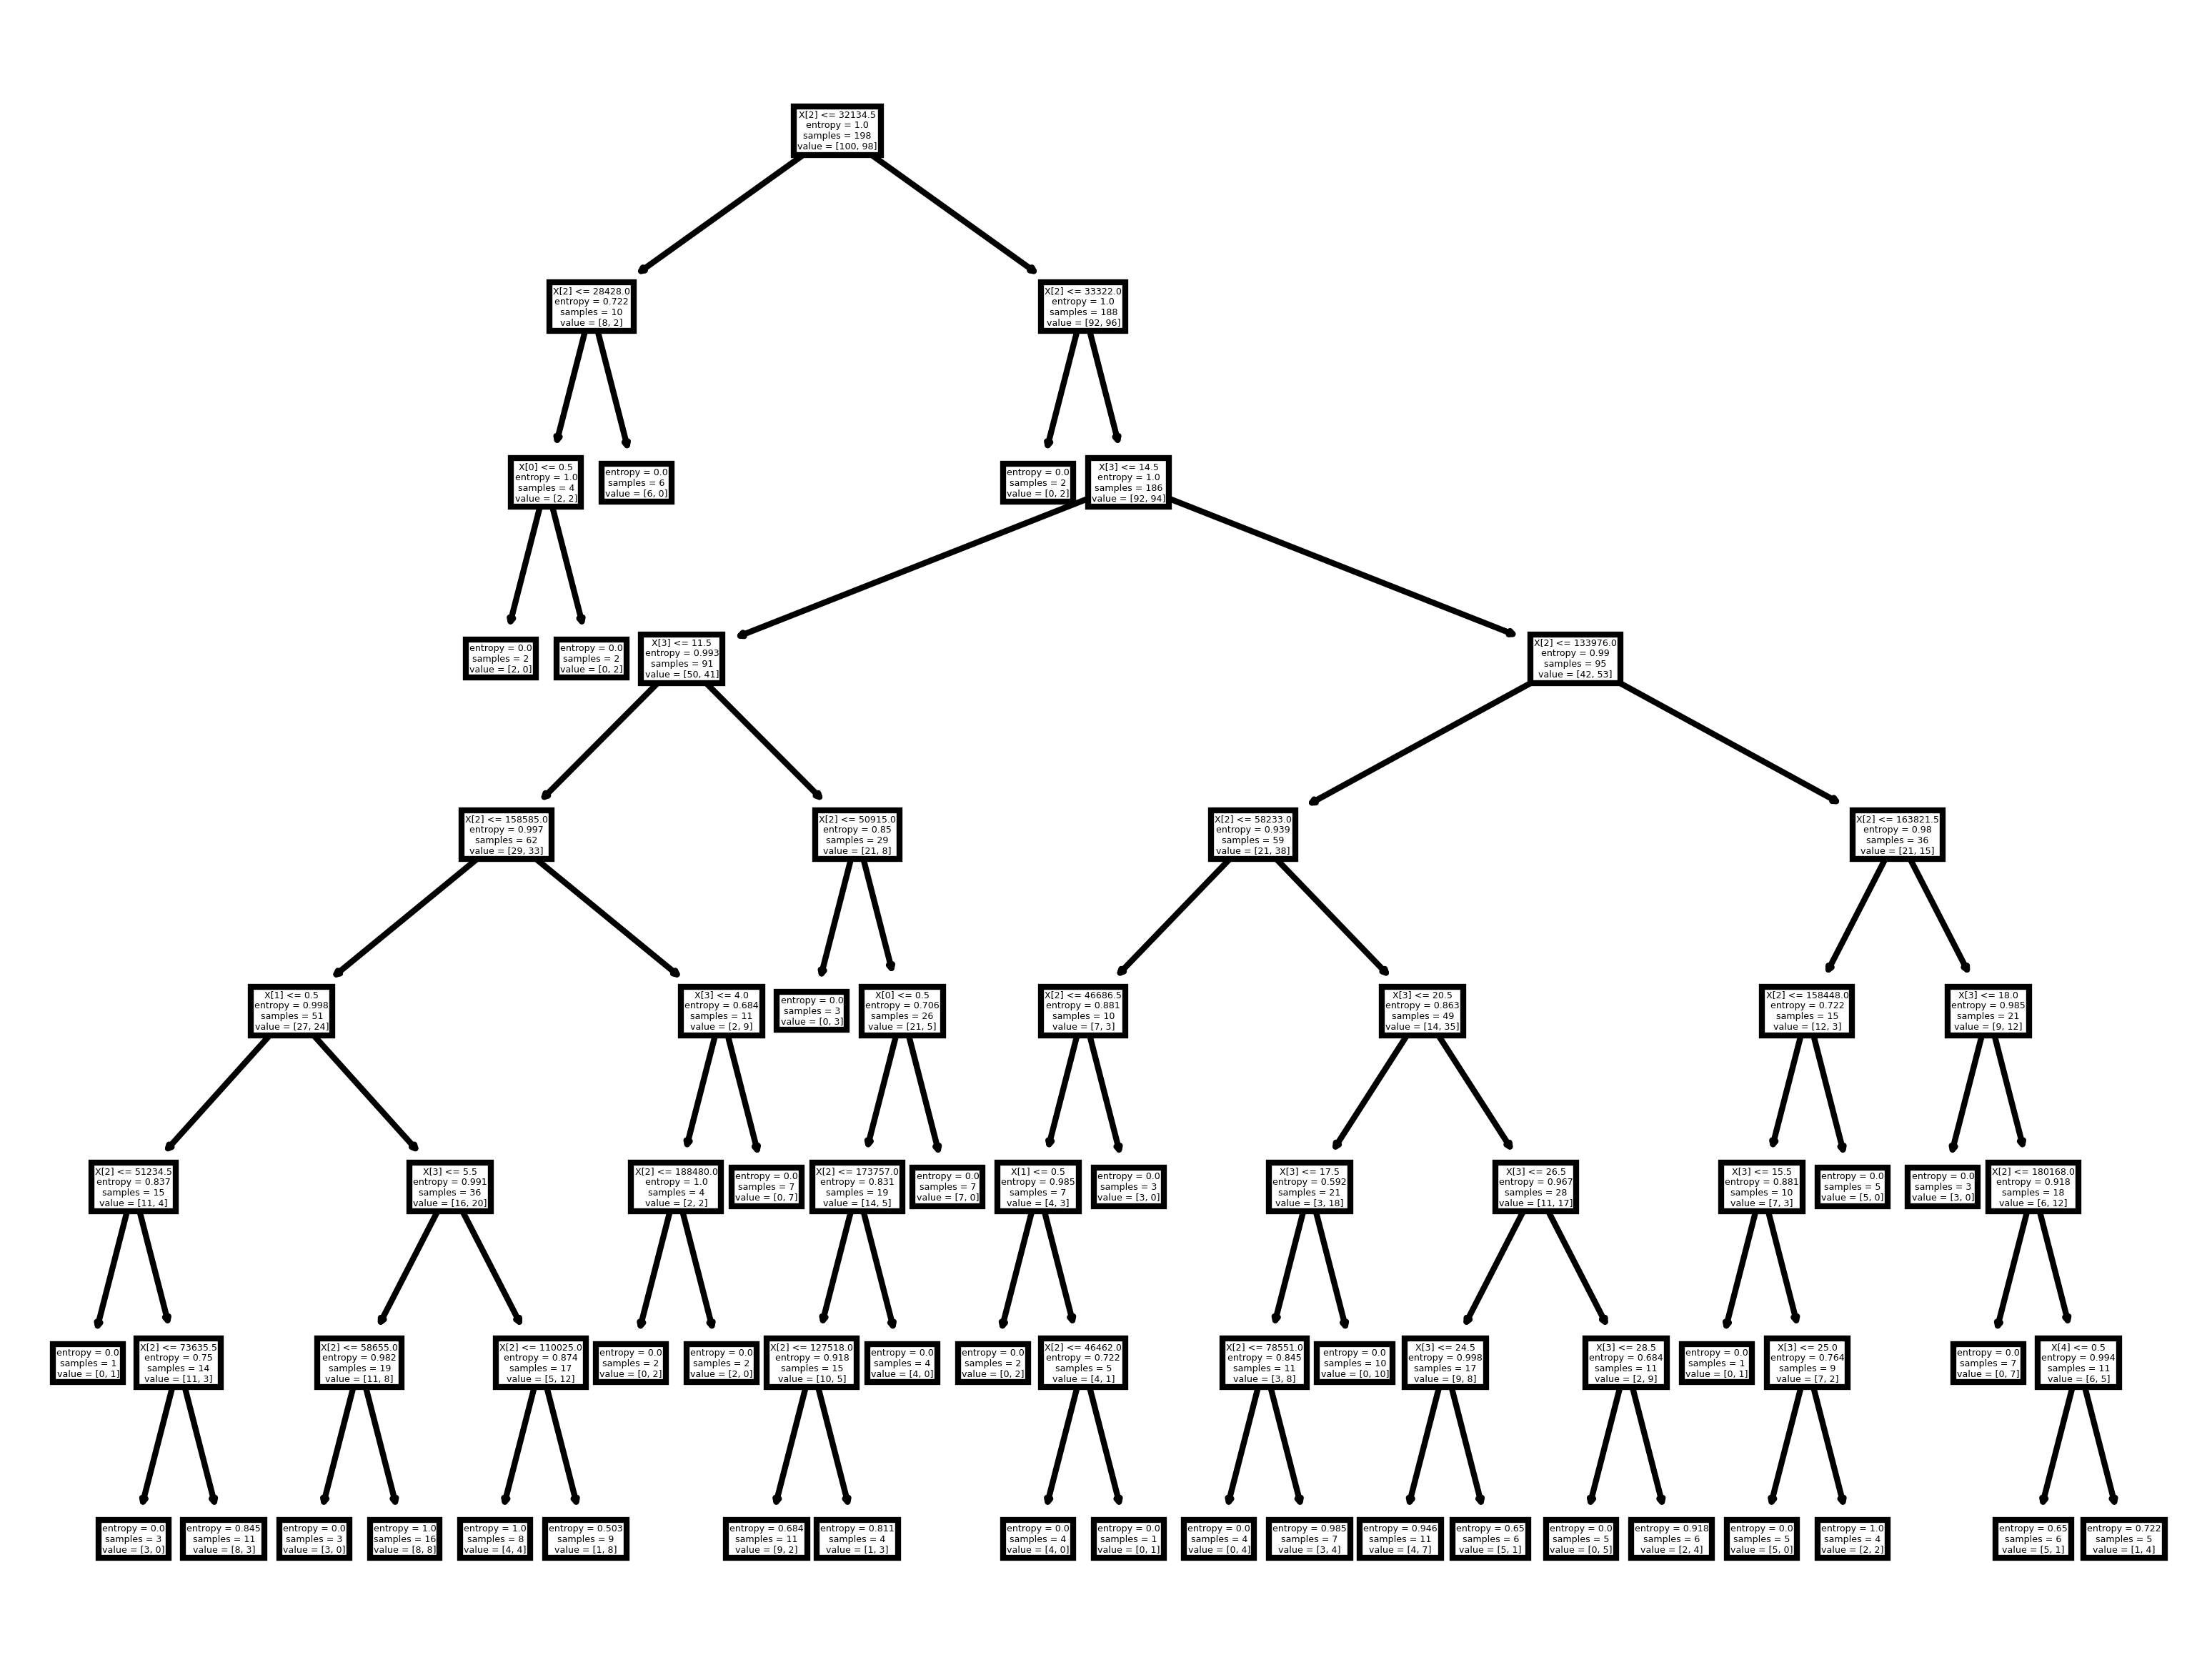

In [59]:
plt.figure(dpi=600)
tree.plot_tree(model_balance1);

In [60]:
preds3 = model_balance1.predict(x_test1)
preds3

array(['Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good'], dtype=object)

In [61]:
print(classification_report(y_test1,preds3))

              precision    recall  f1-score   support

        Good       0.44      0.62      0.52        24
       Risky       0.44      0.27      0.33        26

    accuracy                           0.44        50
   macro avg       0.44      0.45      0.43        50
weighted avg       0.44      0.44      0.42        50



### SMOTE for balancing Data

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
# transform the dataset
smt = SMOTE()
smote_x, smote_y = smt.fit_resample(x_train, y_train)

In [64]:
smote_y.value_counts()

Good     384
Risky    384
Name: Tax_cat, dtype: int64

### SMOTE model building

In [65]:
model_smote=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,max_features="sqrt")
model_smote.fit(smote_x,smote_y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_split=5)

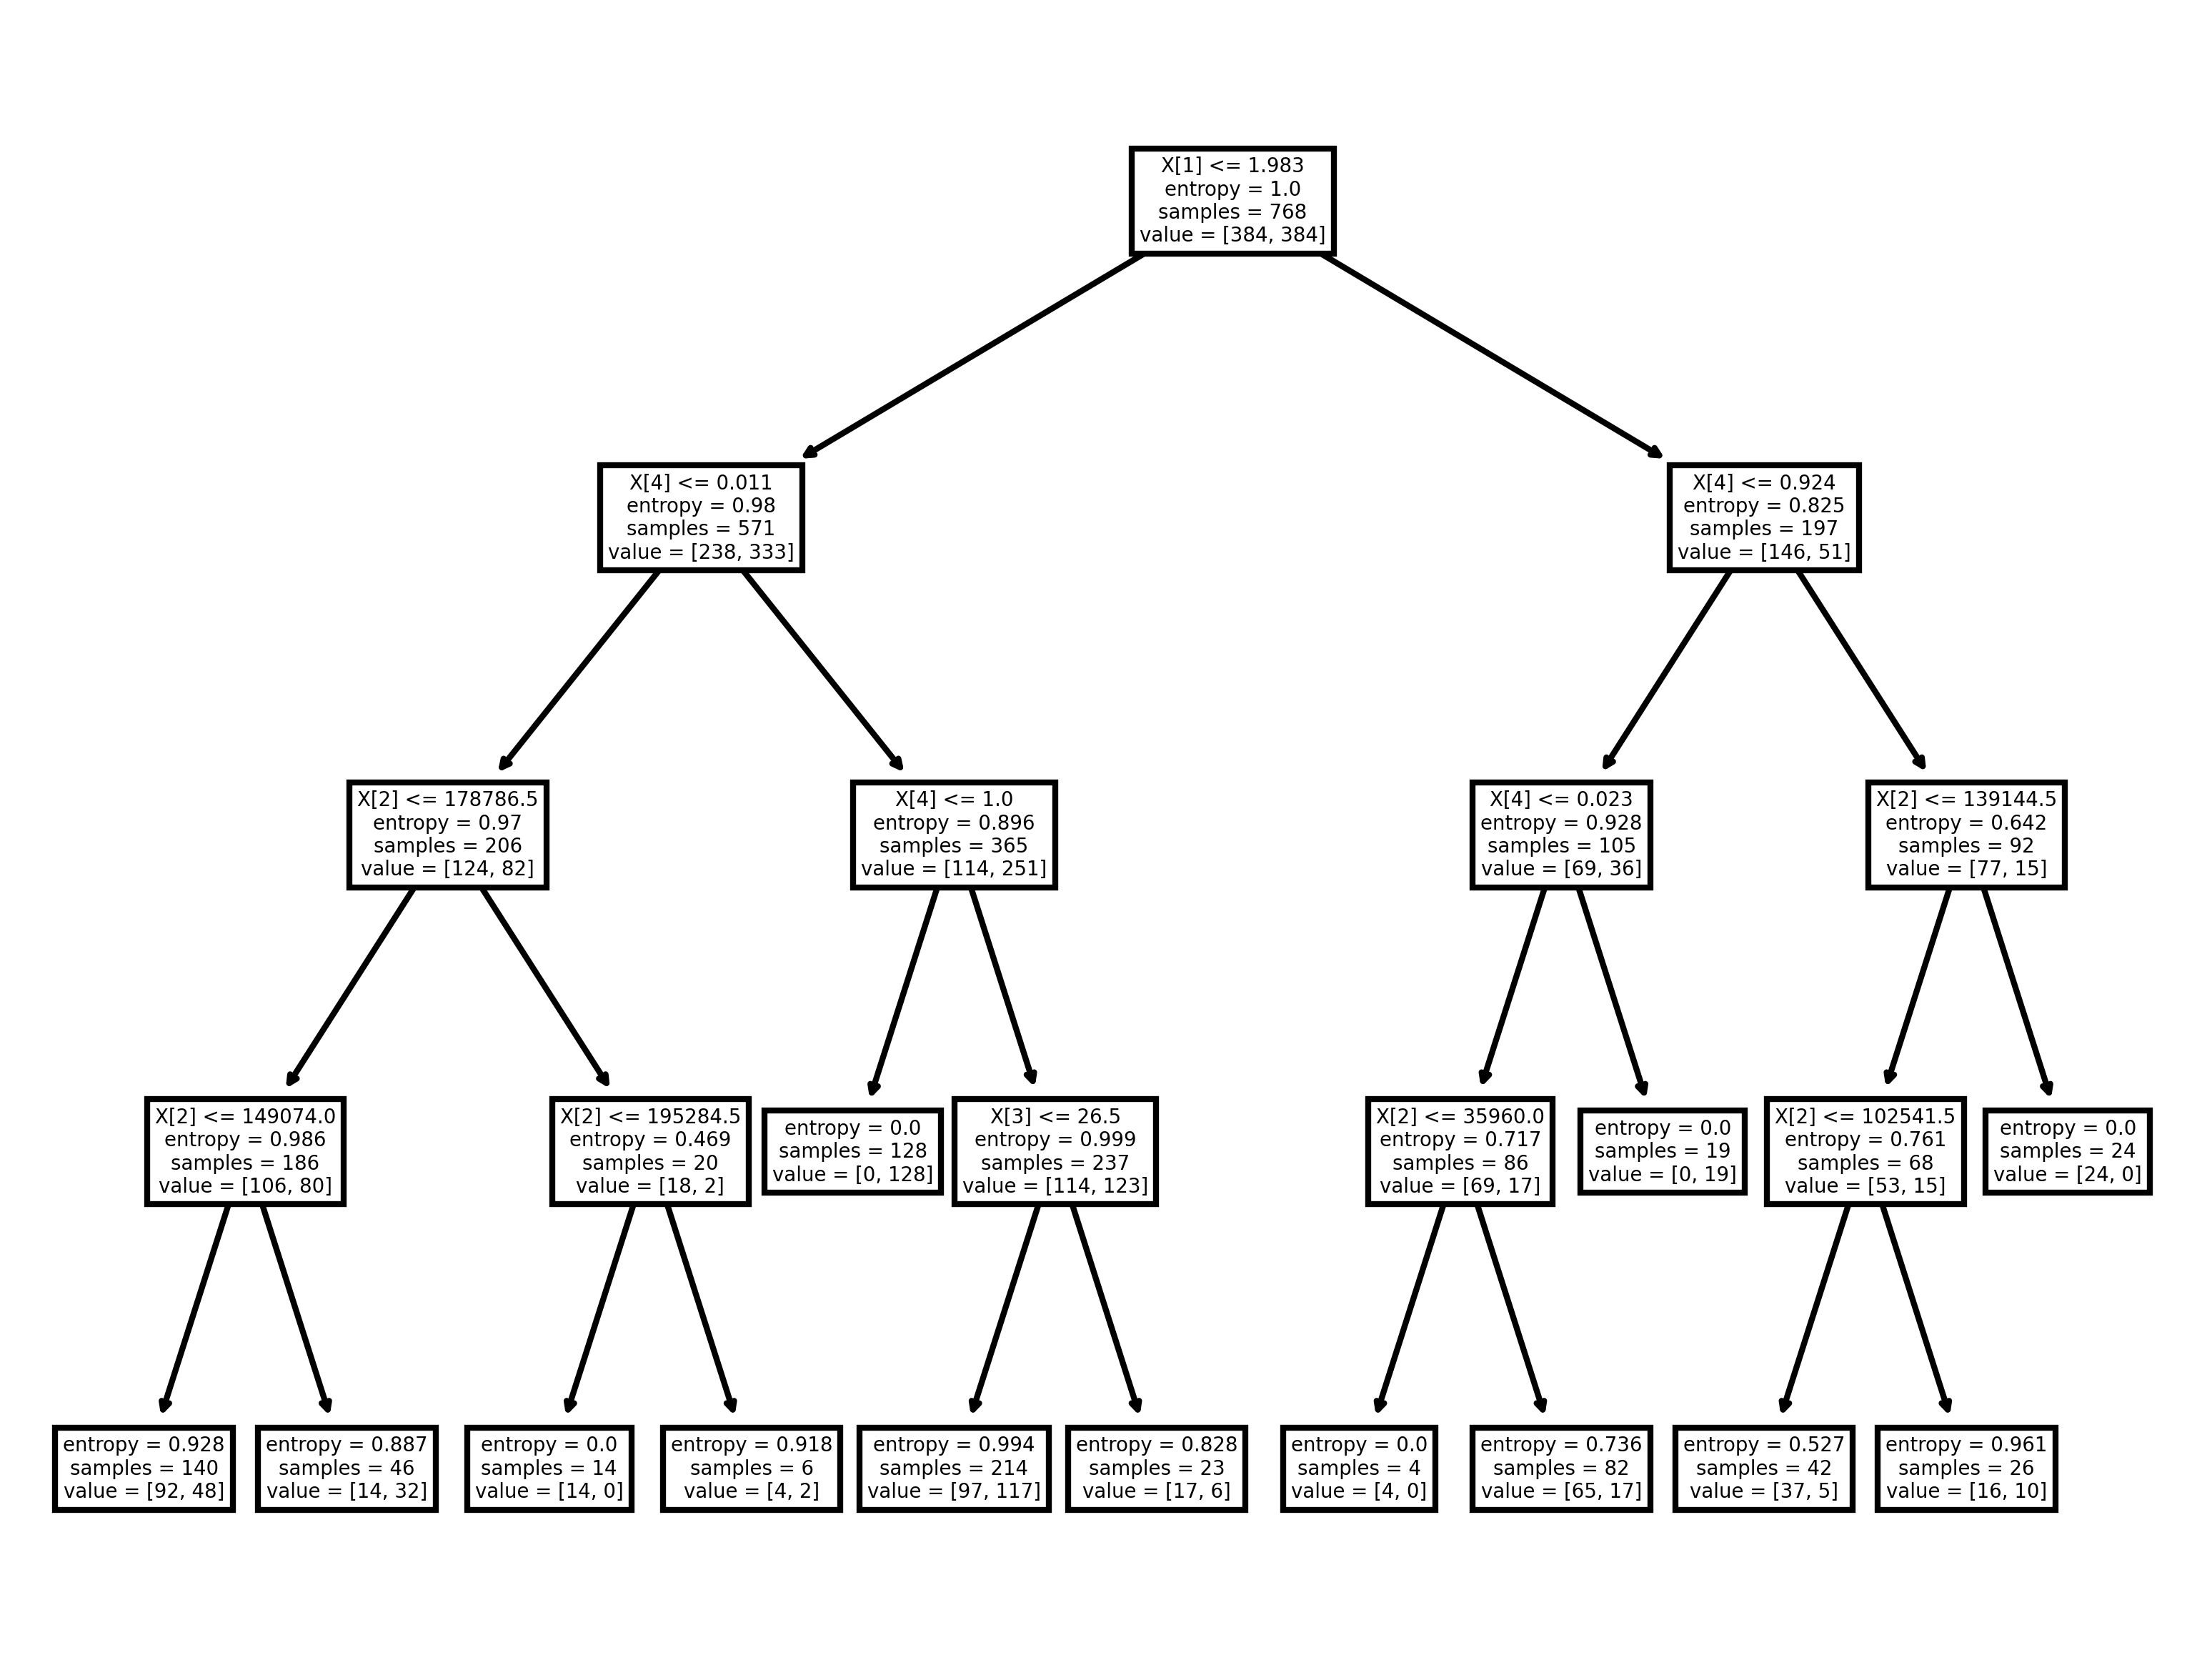

In [66]:
plt.figure(dpi=600)
tree.plot_tree(model_smote);

In [67]:
## prediction of training data
preds_smote_ytrain = model_smote.predict(x_train)
preds_smote_ytrain

array(['Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good',

In [68]:
print(classification_report(y_train,preds_smote_ytrain))

              precision    recall  f1-score   support

        Good       0.83      0.71      0.77       384
       Risky       0.27      0.43      0.33        96

    accuracy                           0.65       480
   macro avg       0.55      0.57      0.55       480
weighted avg       0.72      0.65      0.68       480



In [69]:
preds_smote = model_smote.predict(x_test)
preds_smote

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Good', 'Risky', 'Good', 'Risky', 'G

In [70]:
print(classification_report(y_test,preds_smote))

              precision    recall  f1-score   support

        Good       0.74      0.65      0.69        92
       Risky       0.18      0.25      0.21        28

    accuracy                           0.56       120
   macro avg       0.46      0.45      0.45       120
weighted avg       0.61      0.56      0.58       120



### KFold

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
new_model_smote=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=5,max_features="sqrt")

In [75]:
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Tax_cat, Length: 600, dtype: object

In [77]:
Accuracy_values=cross_val_score(new_model_smote,X,Y,cv=10)
print('\nAccuracy values for 10-fold cross validation:\n',Accuracy_values)
print('n\Final Average Accuracy of the model:',round(Accuracy_values.mean(),2))


Accuracy values for 10-fold cross validation:
 [0.78333333 0.81666667 0.8        0.8        0.8        0.78333333
 0.78333333 0.78333333 0.76666667 0.78333333]
n\Final Average Accuracy of the model: 0.79


In [78]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

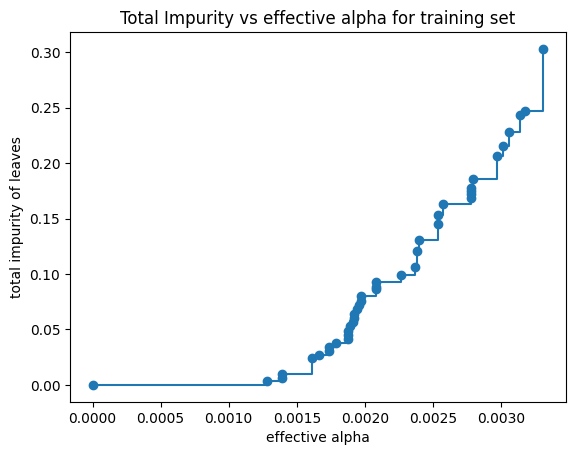

In [79]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [80]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.004257427446249226


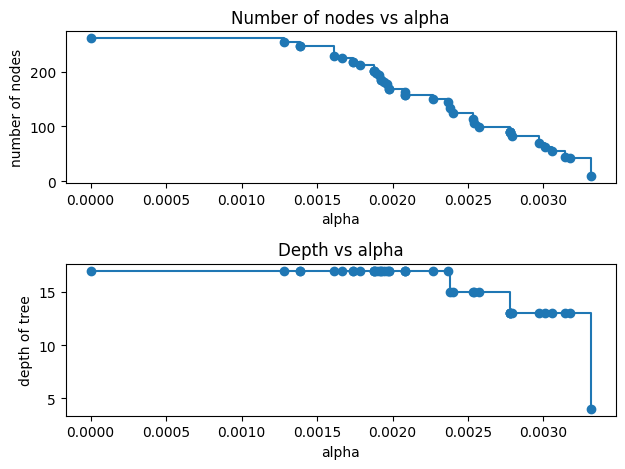

In [81]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

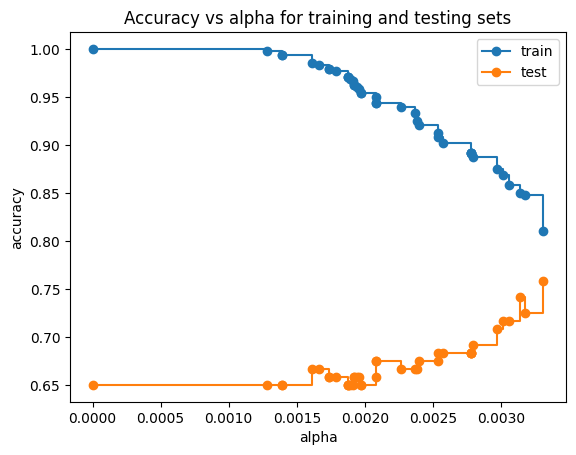

In [82]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [83]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

Training accuracy of best model:  0.8104166666666667
Test accuracy of best model:  0.7583333333333333


##### Overfitting is reduced after post_pruning because difference in training and testing accuracy is less as compared to baseline model